In this exercise we'll take a look at some (simulated) proton-proton collision data.  The events chosen all have at least two reconstructed muons.  If you're not familiar, a muon is a heavy cousin of the electron; see [here](https://en.wikipedia.org/wiki/Muon) and [here](https://pdg.lbl.gov/2020/tables/rpp2020-sum-leptons.pdf) for some more information.  Some of these events contain (at least) a pair of real muons with opposite electric charge frmo the decay of a Z boson (see [here](https://en.wikipedia.org/wiki/W_and_Z_bosons),[here](https://pdg.lbl.gov/2020/listings/rpp2020-list-z-boson.pdf)).  Other events contain one real muon (could have positive or negative charge) from the decay of a W boson (more [here](https://pdg.lbl.gov/2020/listings/rpp2020-list-w-boson.pdf)) and one or more "fake" muons of either electric charge.  Here, fake means a lepton that is not from the decay of a W or Z boson.  These are typically from semi-leptonic decays of charm or bottom hadrons or decays in flight of kaons.

Take a look at the data in the file *total_withouttruth_mod.csv*.  Read in the data, organizing muons by event.  Plot a histogram of the invariant mass of all possible pairs of muons in each event, i.e. you may have more than one entry per event.  Play around and choose reasonable binning and comment on your observations.  Then, split the muon pairs into two samples, one where the muons have opposite electric charge and one where the muons have the same electric charge.  Plot histograms of the two populations and comment on your observations.

To explore various methods of interacting with data, try the exercise using different tools.  For example: using standard objects (e.g. list, np.array, dict, etc.) and plotting with matplotlib; write your own class objects for a LorentzVector and a Particle (e.g. LorentzVector, charge); using pandas.  What are the strengths and challenges of each approach?

 **Method 1**: Using standard objects.

In [1]:
import csv
import numpy as np

import sys
from os import getcwd
sys.path.append(getcwd())
from convert_muon_data import convert_row

## read muon data from csv file into a list, with an entry (list) for each event containing np.array with the muon 4-vector components
muons = []
with open('total_withouttruth_mod.csv') as csv_file:
    csv_reader = csv.reader(csv_file,delimiter=',')
    for index,row in enumerate(csv_reader):
        if index==0: continue
        nrow,nevt,nmu,px,py,pz,E,charge=convert_row(row)
        if nevt == len(muons): muons.append([])
        muons[nevt].append(np.array([px,py,pz,E]))
        
csv_file.close()

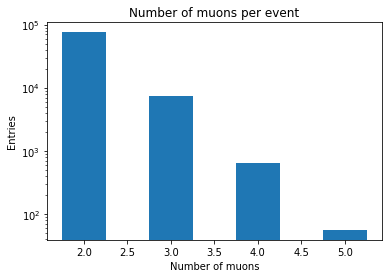

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

## plot a histogram of the number of muons per event
nmuons = np.array([len(x) for x in muons])
plt.hist(nmuons,bins=np.arange(np.amin(nmuons),np.amax(nmuons)+1)-0.5,rwidth=0.5)
plt.yscale('log')
plt.xlabel('Number of muons')
plt.ylabel('Entries')
plt.title('Number of muons per event')
plt.show()

In [4]:
## create all possible pairs of muons for each event
dimuons = []
for index,lom in enumerate(muons):
    if index == len(dimuons): dimuons.append([])
    for idx,i in enumerate(lom[:-1]):
        for j in lom[idx+1:]:
            dimuons[index].append(i+j)
dimuons = np.asarray(dimuons)

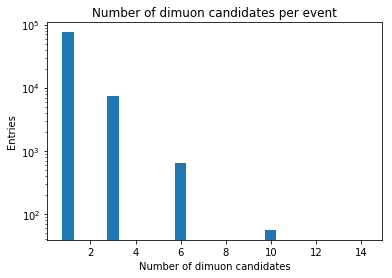

In [5]:
## plot the number of dimuon pairs in each event, what do you expect to see?
ndimuons = np.asarray([len(x) for x in dimuons])
plt.hist(ndimuons,bins=np.arange(np.amin(ndimuons),np.amax(ndimuons)+1)-0.5,rwidth=0.5)
plt.yscale('log')
plt.xlabel('Number of dimuon candidates')
plt.ylabel('Entries')
plt.title('Number of dimuon candidates per event')
plt.show()

In [6]:
## calculate the invariant mass of the muon pairs
def get_mass(i):
    return np.sqrt(i[-1]*i[-1]-np.sum(i[:-1]*i[:-1]))

dimumass = []
for lod in dimuons:
    for x in lod:
        m = get_mass(x)
        dimumass.append(m)
dimumass = np.asarray(dimumass)

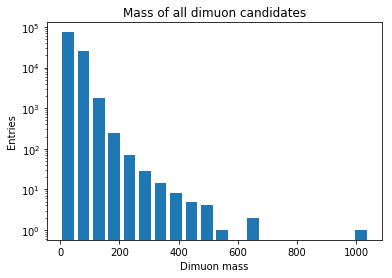

In [7]:
## make a histogram of the dimuon invariant mass
plt.hist(dimumass,bins=20,rwidth=0.75)
plt.yscale('log')
plt.xlabel('Dimuon mass')
plt.ylabel('Entries')
plt.title('Mass of all dimuon candidates')
plt.show()

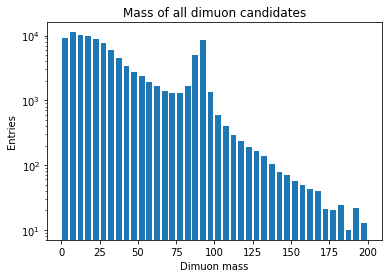

In [8]:
## let's try with a different binning focused more on the lower mass values where most of the entries are
plt.hist(dimumass,bins=np.linspace(0,200,41),rwidth=0.75)
plt.yscale('log')
plt.xlabel('Dimuon mass')
plt.ylabel('Entries')
plt.title('Mass of all dimuon candidates')
plt.show()